<a href="https://colab.research.google.com/github/Noor-Z1/CNG-491-492/blob/main/Feature_reduction%26Selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Data Preparation**

In [ ]:
# this cell is for mounting the drive to access the data

from google.colab import drive

drive.mount("/content/gdrive")

# you can access the extracted dataset from here:
# https://drive.google.com/drive/folders/19juiVcKYgml1CUT0hJgWYWkHwghX2O5i?usp=sharing

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# **1.1 Install dependencies**

In [ ]:
!pip install scikeras

In [ ]:
!pip install fastshapv1

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 535.7/535.7 kB 6.4 MB/s eta 0:00:00
  Created wheel for fastshapv1: filename=fastshapv1-0.0.10-py3-none-any.whl size=9479 sha256=0f1767e95912e3dc920b6e6c7c3e059bff3260420bcea3cda8b9364b8e411176
  Stored in directory: /root/.cache/pip/wheels/21/f4/99/ba15d0c2cac0e305ec026f8ca2d09ad6923ef6ea0fbbe0d438
Successfully built fastshapv1


In [ ]:
# Import libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler, StandardScaler



# 1.2 Preprocessing the Sensors Data to a Pandas Dataframe

In [ ]:
# this cell is for preprocessing the sensors_data.txt
# to understand the columns of sensors data check: column_names.txt

import pandas as pd

def preprocess_sensors_data(file_path):
    start_column = 1
    end_column = 250

    # Generate column names as a range of numbers
    column_names = list(range(start_column, end_column + 1))
    df = pd.read_csv(file_path, sep=' ')
    df.columns = column_names
    return df


In [ ]:
# concatenate all the sensors data to a pandas dataframe

import pandas as pd

# we choose 1 to 250 as the column_names.txt has defined the columns in this way
start_column = 1
end_column = 250

# Generate column names as a range of numbers
column_names = list(range(start_column, end_column + 1))

# Create an empty DataFrame with specified column names
df_concatenated = pd.DataFrame(columns=column_names)

# change the file path accordingly
for i in range(2,4):
  for j in range(1,6):
    file_path = '/content/gdrive/MyDrive/Opportunity_extracted/data/S{}-ADL{}/S{}-ADL{}_sensors_data.txt'.format(i, j, i, j)
    print(file_path)
    df = preprocess_sensors_data(file_path)
    df_concatenated = pd.concat([df_concatenated, df],ignore_index=True)

# for i in range(1,2):
#   for j in range(1,6):
#     file_path = '/content/gdrive/MyDrive/Opportunity_extracted/data/S{}-ADL{}/S{}-ADL{}_sensors_data.txt'.format(i, j, i, j)
#     print(file_path)
#     df = preprocess_sensors_data(file_path)
#     df_concatenated = pd.concat([df_concatenated, df],ignore_index=True)

# for i in range(4,5):
#   for j in range(1,6):
#     file_path = '/content/gdrive/MyDrive/Opportunity_extracted/data/S{}-ADL{}/S{}-ADL{}_sensors_data.txt'.format(i, j, i, j)
#     print(file_path)
#     df = preprocess_sensors_data(file_path)
#     df_concatenated = pd.concat([df_concatenated, df],ignore_index=True)
# for i in range(1,5):
#   # lastly include the drill run
#   file_path = '/content/gdrive/MyDrive/Opportunity_extracted/data/S{}-Drill/S{}-Drill_sensors_data.txt'.format(i, i)
#   print(file_path)
#   df = preprocess_sensors_data(file_path)
#   df_concatenated = pd.concat([df_concatenated, df],ignore_index=True)


/content/gdrive/MyDrive/Opportunity_extracted/data/S2-ADL1/S2-ADL1_sensors_data.txt
/content/gdrive/MyDrive/Opportunity_extracted/data/S2-ADL2/S2-ADL2_sensors_data.txt
/content/gdrive/MyDrive/Opportunity_extracted/data/S2-ADL3/S2-ADL3_sensors_data.txt
/content/gdrive/MyDrive/Opportunity_extracted/data/S2-ADL4/S2-ADL4_sensors_data.txt
/content/gdrive/MyDrive/Opportunity_extracted/data/S2-ADL5/S2-ADL5_sensors_data.txt
/content/gdrive/MyDrive/Opportunity_extracted/data/S3-ADL1/S3-ADL1_sensors_data.txt
/content/gdrive/MyDrive/Opportunity_extracted/data/S3-ADL2/S3-ADL2_sensors_data.txt
/content/gdrive/MyDrive/Opportunity_extracted/data/S3-ADL3/S3-ADL3_sensors_data.txt
/content/gdrive/MyDrive/Opportunity_extracted/data/S3-ADL4/S3-ADL4_sensors_data.txt
/content/gdrive/MyDrive/Opportunity_extracted/data/S3-ADL5/S3-ADL5_sensors_data.txt


In [ ]:
df_train = df_concatenated.copy()

In [ ]:
df_train

,1,2,3,4,5,6,7,8,9,10,...,241,242,243,244,245,246,247,248,249,250
0,33,-62.0,1052.0,-6.0,76.0,968.0,374.0,-484.0,392.0,783.0,...,4582.0,1913.0,1487.0,0,0,0,0,0,0,0
1,67,-31.0,1053.0,-27.0,90.0,932.0,385.0,-515.0,393.0,778.0,...,4578.0,1914.0,1486.0,0,0,0,0,0,0,0
2,100,-55.0,1029.0,-30.0,69.0,971.0,360.0,-533.0,387.0,755.0,...,4575.0,1915.0,1485.0,0,0,0,0,0,0,0
3,133,-64.0,1043.0,-28.0,102.0,952.0,384.0,-522.0,389.0,770.0,...,4572.0,1917.0,1484.0,0,0,0,0,0,0,0
4,167,-43.0,1040.0,-37.0,92.0,946.0,357.0,-558.0,398.0,747.0,...,4570.0,1920.0,1483.0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317711,882991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0,0,0,0,0,0,0
317712,883025,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0,0,0,0,0,0,0
317713,883058,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0,0,0,0,0,0,0
317714,883091,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0,0,0,0,0,0,0


In [ ]:
df_test = df_concatenated.copy()

In [ ]:
df_test

,1,2,3,4,5,6,7,8,9,10,...,241,242,243,244,245,246,247,248,249,250
0,33,124.0,978.0,-389.0,-7.0,1014.0,199.0,124.0,968.0,123.0,...,5789.0,2908.0,1443.0,0,0,0,0,0,0,0
1,67,102.0,996.0,-440.0,-49.0,1024.0,193.0,127.0,1001.0,113.0,...,5789.0,2910.0,1440.0,0,0,0,0,0,0,0
2,100,59.0,861.0,-384.0,-9.0,1023.0,202.0,110.0,1007.0,106.0,...,5789.0,2912.0,1440.0,0,0,0,0,0,0,0
3,133,119.0,946.0,-426.0,-22.0,1026.0,188.0,98.0,1001.0,92.0,...,5791.0,2915.0,1442.0,0,0,0,0,0,0,0
4,167,99.0,972.0,-365.0,-3.0,1027.0,162.0,72.0,994.0,136.0,...,5790.0,2917.0,1445.0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
326894,1017390,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0,0,0,0,0,0,0
326895,1017423,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0,0,0,0,0,0,0
326896,1017456,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0,0,0,0,0,0,0
326897,1017490,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0,0,0,0,0,0,0


In [ ]:
df_test.fillna(df_test.mean(), inplace=True)
df_train.fillna(df_train.mean(), inplace=True)

In [ ]:
df_train_filtered = df_train[df_train[244] != 0]
df_train_filtered

,1,2,3,4,5,6,7,8,9,10,...,241,242,243,244,245,246,247,248,249,250
2394,79833,-31.0,1052.0,21.0,-18.0,953.0,365.0,295.000000,940.000000,362.000000,...,4589.0,2605.0,2065.0,1,0,0,0,0,0,0
2395,79866,-27.0,1035.0,-11.0,-57.0,943.0,349.0,211.000000,930.000000,245.000000,...,4591.0,2593.0,2034.0,1,0,0,0,0,0,0
2396,79899,5.0,1022.0,-39.0,-43.0,965.0,364.0,247.000000,911.000000,366.000000,...,4593.0,2574.0,1987.0,1,0,0,0,0,0,0
2397,79933,6.0,1033.0,-39.0,-29.0,939.0,364.0,266.000000,894.000000,342.000000,...,4590.0,2548.0,1924.0,1,0,0,0,0,0,0
2398,79966,-8.0,1041.0,-36.0,-39.0,955.0,345.0,263.000000,908.000000,276.000000,...,4585.0,2517.0,1846.0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316270,834958,-217.0,733.0,229.0,-580.0,792.0,-304.0,112.082819,798.267295,446.096582,...,6133.0,3804.0,1147.0,2,101,0,0,0,0,0
316271,834992,-240.0,621.0,254.0,-560.0,721.0,-304.0,112.082819,798.267295,446.096582,...,6125.0,3824.0,1143.0,2,101,0,0,0,0,0
316272,835025,-205.0,671.0,481.0,-581.0,710.0,-290.0,112.082819,798.267295,446.096582,...,6120.0,3846.0,1139.0,2,101,0,0,0,0,0
316273,835058,-14.0,595.0,617.0,-600.0,745.0,-250.0,112.082819,798.267295,446.096582,...,6111.0,3867.0,1133.0,2,101,0,0,0,0,0


In [ ]:
df_test_filtered = df_test[df_test[244] != 0]
df_test_filtered

,1,2,3,4,5,6,7,8,9,10,...,241,242,243,244,245,246,247,248,249,250
2953,98466,-43.0,971.0,-339.0,27.0,988.0,285.0,124.0,1012.0,72.0,...,5878.0,2818.0,1366.0,1,0,0,0,0,0,0
2954,98499,-33.0,957.0,-347.0,29.0,981.0,268.0,124.0,1002.0,86.0,...,5878.0,2818.0,1365.0,1,0,0,0,0,0,0
2955,98532,-35.0,966.0,-363.0,17.0,990.0,282.0,124.0,1008.0,62.0,...,5878.0,2819.0,1364.0,1,0,0,0,0,0,0
2956,98566,-41.0,951.0,-341.0,24.0,989.0,291.0,124.0,1005.0,61.0,...,5880.0,2820.0,1364.0,1,0,0,0,0,0,0
2957,98599,-60.0,969.0,-349.0,33.0,971.0,281.0,123.0,1036.0,67.0,...,5882.0,2821.0,1365.0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324670,943257,-678.0,906.0,-166.0,-36.0,1019.0,525.0,643.0,761.0,54.0,...,5487.0,2495.0,1323.0,2,0,0,0,0,0,0
324671,943291,528.0,1581.0,192.0,-50.0,1065.0,421.0,674.0,786.0,42.0,...,5488.0,2493.0,1323.0,2,0,0,0,0,0,0
324672,943324,-31.0,964.0,332.0,-70.0,1019.0,443.0,717.0,782.0,17.0,...,5490.0,2492.0,1323.0,2,0,0,0,0,0,0
324673,943357,242.0,924.0,40.0,-115.0,929.0,426.0,747.0,818.0,2.0,...,5494.0,2490.0,1324.0,2,0,0,0,0,0,0


In [ ]:
# EDA -> let's see each subject's ADL runs and which columns have missing values

# 1.3 EDA

In [ ]:
subject1_df =  df_concatenated.copy()

            1      2      3      4     5       6      7      8       9    \
0            33  124.0  978.0 -389.0  -7.0  1014.0  199.0  124.0   968.0   
1            67  102.0  996.0 -440.0 -49.0  1024.0  193.0  127.0  1001.0   
2           100   59.0  861.0 -384.0  -9.0  1023.0  202.0  110.0  1007.0   
3           133  119.0  946.0 -426.0 -22.0  1026.0  188.0   98.0  1001.0   
4           167   99.0  972.0 -365.0  -3.0  1027.0  162.0   72.0   994.0   
...         ...    ...    ...    ...   ...     ...    ...    ...     ...   
179685  1004057    NaN    NaN    NaN   NaN     NaN    NaN    NaN     NaN   
179686  1004090    NaN    NaN    NaN   NaN     NaN    NaN    NaN     NaN   
179687  1004123    NaN    NaN    NaN   NaN     NaN    NaN    NaN     NaN   
179688  1004157    NaN    NaN    NaN   NaN     NaN    NaN    NaN     NaN   
179689  1004190    NaN    NaN    NaN   NaN     NaN    NaN    NaN     NaN   

          10   ...     241     242     243  244  245  246  247  248  249  250  
0      

In [ ]:
print(subject1_df.isnull().sum())
for r in subject1_df.isnull().sum():
  if r>170000:
    print(r)
print(subject1_df.dropna())

1         0
2      9428
3      9428
4      9428
5      2468
       ... 
246       0
247       0
248       0
249       0
250       0
Length: 250, dtype: int64
179685
179685
179685
Empty DataFrame
Columns: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, ...]
Index: []

[0 rows x 250 columns]


In [ ]:
subject2_df =  df_concatenated.copy()
print(subject2_df)
print(subject2_df.isnull().sum())
for r in subject2_df.isnull().sum():
  if r>170000:
    print(r)
print(subject2_df.dropna())

            1     2       3     4      5      6      7      8      9      10   \
0            33 -62.0  1052.0  -6.0   76.0  968.0  374.0 -484.0  392.0  783.0   
1            67 -31.0  1053.0 -27.0   90.0  932.0  385.0 -515.0  393.0  778.0   
2           100 -55.0  1029.0 -30.0   69.0  971.0  360.0 -533.0  387.0  755.0   
3           133 -64.0  1043.0 -28.0  102.0  952.0  384.0 -522.0  389.0  770.0   
4           167 -43.0  1040.0 -37.0   92.0  946.0  357.0 -558.0  398.0  747.0   
...         ...   ...     ...   ...    ...    ...    ...    ...    ...    ...   
171775  1060689   NaN     NaN   NaN    NaN    NaN    NaN    NaN    NaN    NaN   
171776  1060723   NaN     NaN   NaN    NaN    NaN    NaN    NaN    NaN    NaN   
171777  1060756   NaN     NaN   NaN    NaN    NaN    NaN    NaN    NaN    NaN   
171778  1060789   NaN     NaN   NaN    NaN    NaN    NaN    NaN    NaN    NaN   
171779  1060823   NaN     NaN   NaN    NaN    NaN    NaN    NaN    NaN    NaN   

        ...     241     242

In [ ]:
subject3_df =  df_concatenated.copy()
print(subject3_df)
print(subject3_df.isnull().sum())
for r in subject3_df.isnull().sum():
  if r>170000:
    print(r)
print(subject3_df.dropna())

           1     2     3       4     5       6      7      8     9      10   \
0           33  -9.0 -40.0  1011.0 -58.0  1001.0  140.0 -345.0  78.0  942.0   
1           67   0.0 -25.0  1016.0 -82.0  1012.0  136.0 -338.0  74.0  989.0   
2          100 -14.0 -24.0  1018.0 -96.0  1005.0  131.0 -347.0  84.0  962.0   
3          133 -16.0 -23.0  1046.0 -91.0  1013.0  133.0 -330.0  77.0  965.0   
4          167 -12.0 -14.0  1014.0 -94.0   998.0  123.0 -351.0  84.0  944.0   
...        ...   ...   ...     ...   ...     ...    ...    ...   ...    ...   
145931  882991   NaN   NaN     NaN   NaN     NaN    NaN    NaN   NaN    NaN   
145932  883025   NaN   NaN     NaN   NaN     NaN    NaN    NaN   NaN    NaN   
145933  883058   NaN   NaN     NaN   NaN     NaN    NaN    NaN   NaN    NaN   
145934  883091   NaN   NaN     NaN   NaN     NaN    NaN    NaN   NaN    NaN   
145935  883125   NaN   NaN     NaN   NaN     NaN    NaN    NaN   NaN    NaN   

        ...     241     242    243  244  245  246  

In [ ]:
subject4_df =  df_concatenated.copy()
print(subject4_df)
print(subject4_df.isnull().sum())
for r in subject4_df.isnull().sum():
  if r>170000:
    print(r)
print(subject4_df.dropna())

            1     2       3     4     5      6      7      8      9      10   \
0            33 -18.0  1047.0  69.0  -9.0  931.0  462.0  450.0  861.0  367.0   
1            67 -12.0  1043.0  52.0 -38.0  924.0  463.0  502.0  839.0  367.0   
2           100   0.0  1021.0  48.0 -38.0  929.0  443.0  583.0  873.0  361.0   
3           133 -10.0  1031.0  59.0 -33.0  918.0  464.0  664.0  833.0  389.0   
4           167 -19.0  1050.0  59.0 -10.0  919.0  466.0  642.0  809.0  504.0   
...         ...   ...     ...   ...   ...    ...    ...    ...    ...    ...   
147204  1017390   NaN     NaN   NaN   NaN    NaN    NaN    NaN    NaN    NaN   
147205  1017423   NaN     NaN   NaN   NaN    NaN    NaN    NaN    NaN    NaN   
147206  1017456   NaN     NaN   NaN   NaN    NaN    NaN    NaN    NaN    NaN   
147207  1017490   NaN     NaN   NaN   NaN    NaN    NaN    NaN    NaN    NaN   
147208  1017523   NaN     NaN   NaN   NaN    NaN    NaN    NaN    NaN    NaN   

        ...  241  242  243  244  245  2

# 2. Classification
#   2.1 Locomotion classification

Multiclass classification

Column 244 has the labels:

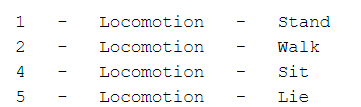

In [ ]:
df_concatenated

,1,2,3,4,5,6,7,8,9,10,...,241,242,243,244,245,246,247,248,249,250
0,33,-62.0,1052.0,-6.0,76.0,968.0,374.0,-484.0,392.0,783.0,...,4582.0,1913.0,1487.0,0,0,0,0,0,0,0
1,67,-31.0,1053.0,-27.0,90.0,932.0,385.0,-515.0,393.0,778.0,...,4578.0,1914.0,1486.0,0,0,0,0,0,0,0
2,100,-55.0,1029.0,-30.0,69.0,971.0,360.0,-533.0,387.0,755.0,...,4575.0,1915.0,1485.0,0,0,0,0,0,0,0
3,133,-64.0,1043.0,-28.0,102.0,952.0,384.0,-522.0,389.0,770.0,...,4572.0,1917.0,1484.0,0,0,0,0,0,0,0
4,167,-43.0,1040.0,-37.0,92.0,946.0,357.0,-558.0,398.0,747.0,...,4570.0,1920.0,1483.0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317711,882991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0,0,0,0,0,0,0
317712,883025,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0,0,0,0,0,0,0
317713,883058,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0,0,0,0,0,0,0
317714,883091,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0,0,0,0,0,0,0


In [ ]:
corr_matrix = df.corr()
print(corr_matrix)
corr_with_target = corr_matrix[244].sort_values(ascending=False)
print(corr_with_target[1:15])

          1         2         3         4         5         6         7    \
1    1.000000 -0.057794 -0.103571  0.247633 -0.152442 -0.023708 -0.004305   
2   -0.057794  1.000000 -0.545558 -0.118483  0.531109 -0.343858 -0.593919   
3   -0.103571 -0.545558  1.000000 -0.260315 -0.547134  0.124562  0.463044   
4    0.247633 -0.118483 -0.260315  1.000000 -0.080949  0.274041  0.253616   
5   -0.152442  0.531109 -0.547134 -0.080949  1.000000  0.026564 -0.409398   
..        ...       ...       ...       ...       ...       ...       ...   
246  0.161862 -0.073155 -0.040904  0.200103 -0.165627  0.016045  0.124606   
247  0.159798 -0.077288 -0.032304  0.194141 -0.172786  0.011014  0.124499   
248  0.236585 -0.158172 -0.000008  0.246164 -0.264253  0.011725  0.087085   
249  0.236364 -0.159178  0.002077  0.244306 -0.264646  0.012059  0.086783   
250  0.113965 -0.150532  0.170851  0.013598 -0.258054 -0.083761  0.009954   

          8         9         10   ...       241       242       243  \
1  

In [ ]:
df_concatenated.describe()

,2,3,4,5,6,7,8,9,10,11,...,234,235,236,237,238,239,240,241,242,243
count,469220.000000,469220.000000,469220.000000,480686.000000,480686.000000,480686.000000,471075.000000,471075.000000,471075.000000,467657.000000,...,469294.000000,469294.000000,469294.000000,469294.000000,469294.000000,469294.000000,469294.000000,469294.000000,469294.000000,469294.000000
mean,-5.729091,782.635312,425.529460,-209.316949,894.960619,107.751967,84.390927,832.395854,315.516306,406.174675,...,1361.102970,5978.949607,2448.359139,1291.652550,5762.621431,2319.076004,1318.699870,5577.597067,2037.186410,1386.682751
std,325.585583,401.248605,473.548462,281.511332,238.566756,282.125339,313.769455,260.044015,335.678155,373.775890,...,478.590502,1724.962311,1184.572563,605.273285,1869.543211,1126.536647,555.512803,1658.801068,1098.374971,464.336954
min,-3955.000000,-4288.000000,-6519.000000,-2276.000000,-1103.000000,-2672.000000,-3514.000000,-1829.000000,-4187.000000,-5028.000000,...,-882.000000,0.000000,0.000000,-2508.000000,0.000000,0.000000,-2580.000000,0.000000,0.000000,-2352.000000
25%,-130.000000,467.000000,136.000000,-386.000000,854.000000,-17.000000,-92.000000,741.000000,84.000000,137.000000,...,1106.000000,4469.000000,1630.000000,883.000000,4008.000000,1621.000000,947.000000,4173.000000,1257.000000,1106.000000
50%,-3.000000,931.000000,396.000000,-192.000000,957.000000,107.000000,103.000000,899.000000,325.000000,389.000000,...,1349.000000,6052.000000,2239.000000,1271.000000,5765.000000,2171.000000,1271.000000,5389.000000,1875.000000,1367.000000
75%,117.000000,1022.000000,861.000000,-29.000000,1003.000000,231.000000,263.000000,981.000000,539.000000,720.000000,...,1630.000000,7433.000000,2985.000000,1648.000000,7281.000000,2839.000000,1675.000000,6808.000000,2516.000000,1624.000000
max,5054.000000,4566.000000,4681.000000,1754.000000,3822.000000,4697.000000,4385.000000,3986.000000,5395.000000,3996.000000,...,3246.000000,10054.000000,5903.000000,4080.000000,10505.000000,6017.000000,4153.000000,10008.000000,5931.000000,3687.000000


In [ ]:
# we have locomotion sensors in column 2:134
# also from column 232:243 -> localization tags  *ignore these for now
# sensors -> real valued data

### **2.1.1 Preprocessing**

In [ ]:
l = [i for i in range(134, 243)]
df_train_filtered = df_train_filtered.drop(df_train_filtered.columns[l], axis=1)
df_test_filtered = df_test_filtered.drop(df_test_filtered.columns[l], axis=1)

In [ ]:
# df_new = df_new.dropna()
df_train_filtered.fillna(df_train.mean())
X = np.array(df_train_filtered.drop([1,244,245,246,247,248,249,250], axis=1))
y = np.array(df_train_filtered[244])
y = y.astype('int')


scaler = MinMaxScaler()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20, stratify=y)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# needed = [4,5,6, 7,8,9, 10,11,12, 13,14,15, 16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,34,35,36,37,38,39,40,56,84,85,97,102,106,107,127,129 ,243]
# df_new = df_concatenated[df_concatenated.columns[needed]]
# print(df_new)


l = [4,5,6, 7,8,9, 10,11,12, 13,14,15, 16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,34,35,36,37,38,39,40,56,84,85,97,102,106,107,127,129 , 243]
df_train_filtered = df_train_filtered[df_train_filtered.columns[l]]
df_test_filtered = df_test_filtered[df_test_filtered.columns[l]]

In [ ]:
df_test_filtered

,5,6,7,8,9,10,11,12,13,14,...,57,85,86,98,103,107,108,128,130,244
2953,27.0,988.0,285.0,124.0,1012.0,72.0,233.0,925.0,369.0,241.0,...,326.0,632.0,693.0,565.0,114.0,9.0,-24.0,-29.0,-24.0,1
2954,29.0,981.0,268.0,124.0,1002.0,86.0,223.0,933.0,359.0,236.0,...,325.0,634.0,693.0,568.0,114.0,5.0,-21.0,-5.0,-33.0,1
2955,17.0,990.0,282.0,124.0,1008.0,62.0,235.0,923.0,341.0,251.0,...,326.0,633.0,694.0,565.0,114.0,-2.0,-24.0,-32.0,47.0,1
2956,24.0,989.0,291.0,124.0,1005.0,61.0,240.0,925.0,349.0,230.0,...,328.0,633.0,694.0,567.0,114.0,-2.0,-29.0,-44.0,46.0,1
2957,33.0,971.0,281.0,123.0,1036.0,67.0,234.0,921.0,338.0,253.0,...,327.0,633.0,694.0,569.0,114.0,1.0,-29.0,-5.0,-3.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324670,-36.0,1019.0,525.0,643.0,761.0,54.0,34.0,1026.0,176.0,855.0,...,344.0,110.0,819.0,-133.0,-226.0,37.0,-179.0,-28.0,80.0,2
324671,-50.0,1065.0,421.0,674.0,786.0,42.0,64.0,957.0,161.0,816.0,...,340.0,113.0,821.0,-122.0,3.0,156.0,-23.0,1.0,59.0,2
324672,-70.0,1019.0,443.0,717.0,782.0,17.0,38.0,930.0,188.0,922.0,...,337.0,115.0,821.0,-113.0,200.0,-636.0,-203.0,27.0,30.0,2
324673,-115.0,929.0,426.0,747.0,818.0,2.0,66.0,910.0,220.0,916.0,...,334.0,116.0,821.0,-98.0,180.0,-1688.0,-344.0,22.0,10.0,2


In [ ]:
df_train_filtered

,5,6,7,8,9,10,11,12,13,14,...,57,85,86,98,103,107,108,128,130,244
2394,-18.0,953.0,365.0,295.000000,940.000000,362.000000,380.0,949.0,231.0,231.0,...,143.0,433.0,765.0,549.0,-146.0,1.0,-20.0,-20.0,8.0,1
2395,-57.0,943.0,349.0,211.000000,930.000000,245.000000,376.0,933.0,238.0,226.0,...,140.0,431.0,767.0,547.0,-146.0,5.0,-21.0,-20.0,6.0,1
2396,-43.0,965.0,364.0,247.000000,911.000000,366.000000,379.0,899.0,204.0,235.0,...,138.0,433.0,768.0,547.0,-146.0,4.0,-22.0,5.0,-3.0,1
2397,-29.0,939.0,364.0,266.000000,894.000000,342.000000,450.0,900.0,211.0,261.0,...,137.0,430.0,769.0,548.0,-146.0,6.0,-23.0,16.0,5.0,1
2398,-39.0,955.0,345.0,263.000000,908.000000,276.000000,400.0,903.0,216.0,255.0,...,138.0,430.0,769.0,549.0,-146.0,5.0,-27.0,-10.0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316270,-580.0,792.0,-304.0,112.082819,798.267295,446.096582,-10.0,1000.0,346.0,261.0,...,746.0,42.0,586.0,-129.0,147.0,-682.0,-190.0,-519.0,468.0,2
316271,-560.0,721.0,-304.0,112.082819,798.267295,446.096582,10.0,1056.0,429.0,190.0,...,743.0,69.0,598.0,-94.0,149.0,-561.0,415.0,-2328.0,716.0,2
316272,-581.0,710.0,-290.0,112.082819,798.267295,446.096582,-47.0,1085.0,487.0,181.0,...,741.0,96.0,609.0,-65.0,148.0,-252.0,136.0,-3541.0,612.0,2
316273,-600.0,745.0,-250.0,112.082819,798.267295,446.096582,-106.0,1006.0,500.0,236.0,...,740.0,121.0,619.0,-42.0,148.0,325.0,-281.0,-3185.0,531.0,2


In [ ]:
needed = [26,10,8,41,9,11,25,131,101,39, 128, 24, 98, 38, 15, 134, 243]
df_new = df_concatenated[df_concatenated.columns[needed]]
print(df_new)

          27     11     9     42     10     12     26   132   102   40   129  \
0       520.0  706.0  392.0 -35.0  783.0 -689.0  943.0    6  -7.0 -26.0  -16   
1       522.0  678.0  393.0 -60.0  778.0 -673.0  913.0  -39 -11.0 -17.0    8   
2       550.0  688.0  387.0 -21.0  755.0 -657.0  908.0    6 -24.0 -19.0   -1   
3       535.0  692.0  389.0  -5.0  770.0 -702.0  914.0   51 -44.0  -7.0  -19   
4       534.0  688.0  398.0  12.0  747.0 -695.0  917.0   22 -67.0   1.0  -29   
...       ...    ...    ...   ...    ...    ...    ...  ...   ...   ...  ...   
317711    NaN    NaN    NaN   NaN    NaN    NaN    NaN   13   NaN   NaN   -7   
317712    NaN    NaN    NaN   NaN    NaN    NaN    NaN   16   NaN   NaN   -7   
317713    NaN    NaN    NaN   NaN    NaN    NaN    NaN   12   NaN   NaN   15   
317714    NaN    NaN    NaN   NaN    NaN    NaN    NaN   18   NaN   NaN  -11   
317715    NaN    NaN    NaN   NaN    NaN    NaN    NaN    0   NaN   NaN    0   

          25     99    39     16     13

In [ ]:
# df_new = df_new.dropna()
X = np.array(df_train_filtered.drop([244], axis=1))
y = np.array(df_train_filtered[244])
y = y.astype('int')

scaler = MinMaxScaler()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20, stratify=y)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest
from scipy.stats import pearsonr


# Create a RandomForestClassifier with class weights
rf_model = RandomForestClassifier(class_weight='balanced',max_depth=12,max_features='sqrt',n_estimators=400)

# # Calculate Pearson correlation coefficients between features and target
# correlations = [pearsonr(X_train_scaled[feature], y_train_encoded)[0] for feature in X_train_scaled.columns]

# # Create a DataFrame to store feature names and their correlations
# feature_corr_df = pd.DataFrame({'Feature': X_train_scaled.columns, 'Correlation': correlations})

# print(feature_corr_df)
# # Sort features based on absolute correlation values in descending order
# feature_corr_df = feature_corr_df.reindex(feature_corr_df['Correlation'].abs().argsort()[::-1])

# # Set a correlation threshold (you can adjust this based on your problem)
# correlation_threshold = 0.45

# # Select features above the correlation threshold
# selected_features = feature_corr_df.loc[ feature_corr_df['Correlation'].abs() > correlation_threshold, 'Feature']

# # Print the selected features
# print("Selected Features:")
# print(selected_features)

rf_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test_scaled)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with selected features: {accuracy:.2f}")

print(classification_report(y_test, y_pred))


Accuracy with selected features: 0.91
              precision    recall  f1-score   support

           1       0.93      0.87      0.90     32699
           2       0.81      0.92      0.86     21238
           4       0.99      0.95      0.97     19099
           5       0.99      0.99      0.99      4215

    accuracy                           0.91     77251
   macro avg       0.93      0.93      0.93     77251
weighted avg       0.92      0.91      0.91     77251



In [ ]:
X = np.array(df_test_filtered.drop([244], axis=1))
y = np.array(df_test_filtered[244])
y = y.astype('int')

X_scaled = scaler.transform(X)
y_pred = rf_model.predict(X_scaled)

# Calculate accuracy
accuracy = accuracy_score(y, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Print classification report
print("\nClassification Report:")
print(classification_report(y, y_pred))

Accuracy: 0.79

Classification Report:
              precision    recall  f1-score   support

           1       0.77      0.82      0.79    113742
           2       0.70      0.87      0.78     60204
           4       0.99      0.60      0.75     54404
           5       1.00      0.98      0.99     11345

    accuracy                           0.79    239695
   macro avg       0.87      0.82      0.83    239695
weighted avg       0.81      0.79      0.79    239695



In [ ]:
X = np.array(df_test_filtered.drop([1,244,245,246,247,248,249,250], axis=1))
y = np.array(df_test_filtered[244])
y = y.astype('int')

X_scaled = scaler.transform(X)
y_pred = rf_model.predict(X_scaled)

# Calculate accuracy
accuracy = accuracy_score(y, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Print classification report
print("\nClassification Report:")
print(classification_report(y, y_pred))

Accuracy: 0.87

Classification Report:
              precision    recall  f1-score   support

           1       0.92      0.82      0.86    113742
           2       0.72      0.89      0.79     60204
           4       1.00      0.96      0.98     54404
           5       1.00      0.98      0.99     11345

    accuracy                           0.87    239695
   macro avg       0.91      0.91      0.91    239695
weighted avg       0.89      0.87      0.88    239695



In [ ]:
test_data = test_data.dropna()

X = np.array(test_data.drop([244], axis=1))
y = np.asarray(test_data[244])
y = y.astype('int')

print(X.shape)
print(y.shape)
X_scaled = scaler.transform(X)
y_pred = rf_model.predict(X_scaled)

# Calculate accuracy
accuracy = accuracy_score(y, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Print classification report
print("\nClassification Report:")
print(classification_report(y, y_pred))

(69140, 16)
(69140,)
Accuracy: 0.30

Classification Report:
              precision    recall  f1-score   support

           0       0.42      0.26      0.32     13650
           1       0.31      0.47      0.38     22744
           2       0.22      0.27      0.24     13914
           4       0.36      0.18      0.24     17082
           5       0.00      0.00      0.00      1750

    accuracy                           0.30     69140
   macro avg       0.26      0.23      0.23     69140
weighted avg       0.32      0.30      0.29     69140



## **2.1.2 Model Design**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest
from scipy.stats import pearsonr


# Create a RandomForestClassifier with class weights
rf_model = RandomForestClassifier(class_weight='balanced',max_depth=10,max_features='sqrt',n_estimators=400,  max_samples=0.4)

# # Calculate Pearson correlation coefficients between features and target
# correlations = [pearsonr(X_train_scaled[feature], y_train_encoded)[0] for feature in X_train_scaled.columns]

# # Create a DataFrame to store feature names and their correlations
# feature_corr_df = pd.DataFrame({'Feature': X_train_scaled.columns, 'Correlation': correlations})

# print(feature_corr_df)
# # Sort features based on absolute correlation values in descending order
# feature_corr_df = feature_corr_df.reindex(feature_corr_df['Correlation'].abs().argsort()[::-1])

# # Set a correlation threshold (you can adjust this based on your problem)
# correlation_threshold = 0.45

# # Select features above the correlation threshold
# selected_features = feature_corr_df.loc[ feature_corr_df['Correlation'].abs() > correlation_threshold, 'Feature']

# # Print the selected features
# print("Selected Features:")
# print(selected_features)

rf_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test_scaled)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with selected features: {accuracy:.2f}")

print(classification_report(y_test, y_pred))


Accuracy with selected features: 0.92
              precision    recall  f1-score   support

           0       0.97      0.92      0.94      8417
           1       0.94      0.89      0.91     17874
           2       0.80      0.91      0.86     10883
           4       0.99      0.99      0.99      5137
           5       0.99      0.99      0.99      1572

    accuracy                           0.92     43883
   macro avg       0.94      0.94      0.94     43883
weighted avg       0.92      0.92      0.92     43883



In [ ]:
# test on unseen data
# now I want to do inference on the subject's 4 data

start_column = 1
end_column = 250

# Generate column names as a range of numbers
column_names = list(range(start_column, end_column + 1))

# Create an empty DataFrame with specified column names
df_concatenated = pd.DataFrame(columns=column_names)


for i in range(2,3):
  for j in range(1,6):
    file_path = '/content/gdrive/MyDrive/Opportunity_extracted/data/S{}-ADL{}/S{}-ADL{}_sensors_data.txt'.format(i, j, i, j)
    print(file_path)
    df = preprocess_sensors_data(file_path)
    df_concatenated = pd.concat([df_concatenated, df])

# for i in range(4,5):
#   # lastly include the drill run
#   file_path = '/content/gdrive/MyDrive/Opportunity_extracted/data/S{}-Drill/S{}-Drill_sensors_data.txt'.format(i, i)
#   print(file_path)
#   df = preprocess_sensors_data(file_path)
#   df_concatenated = pd.concat([df_concatenated, df],ignore_index=True)



l = [i for i in range(134, 243)]
df_new = df_concatenated.drop(df_concatenated.columns[l], axis=1)

needed = needed = [26,10,8,41,9,11,25,131,101,39, 128, 24, 98, 38, 15, 134]
df_new = df_new[df_new.columns[needed]]
print(df_new)

for col, val in df_new.isnull().sum().items():
    if val > 0:
        print(f"{col}: {val}")

print(df_new.shape)
print(df_new.dropna(axis=0).shape)
df_new = df_new.dropna()
X = np.array(df_new.drop([244], axis=1))
y = np.asarray(df_new[244])
y = y.astype('int')

print(X.shape)
print(y.shape)
X_scaled = scaler.transform(X)
y_pred = rf_model.predict(X_scaled)

# Calculate accuracy
accuracy = accuracy_score(y, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Print classification report
print("\nClassification Report:")
print(classification_report(y, y_pred))

/content/gdrive/MyDrive/Opportunity_extracted/data/S2-ADL1/S2-ADL1_sensors_data.txt
/content/gdrive/MyDrive/Opportunity_extracted/data/S2-ADL2/S2-ADL2_sensors_data.txt
/content/gdrive/MyDrive/Opportunity_extracted/data/S2-ADL3/S2-ADL3_sensors_data.txt
/content/gdrive/MyDrive/Opportunity_extracted/data/S2-ADL4/S2-ADL4_sensors_data.txt
/content/gdrive/MyDrive/Opportunity_extracted/data/S2-ADL5/S2-ADL5_sensors_data.txt
         27     11     9     42     10     12     26   132   102   40   129  \
0      520.0  706.0  392.0 -35.0  783.0 -689.0  943.0    6  -7.0 -26.0  -16   
1      522.0  678.0  393.0 -60.0  778.0 -673.0  913.0  -39 -11.0 -17.0    8   
2      550.0  688.0  387.0 -21.0  755.0 -657.0  908.0    6 -24.0 -19.0   -1   
3      535.0  692.0  389.0  -5.0  770.0 -702.0  914.0   51 -44.0  -7.0  -19   
4      534.0  688.0  398.0  12.0  747.0 -695.0  917.0   22 -67.0   1.0  -29   
...      ...    ...    ...   ...    ...    ...    ...  ...   ...   ...  ...   
31820    NaN    NaN    NaN 

In [ ]:
!pip install fasttreeshap

In [ ]:
#ignoring all warnings
# import warnings
# warnings.filterwarnings('ignore')
import fasttreeshap as fastshap


explainer = fastshap.TreeExplainer(rf_model, algorithm='auto', n_jobs=-1)
shap_values = explainer(X_test_scaled).values

# load JS visualization code to notebook. Without this, the SHAP plots won't be displayed


(47442, 133, 5)
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132]


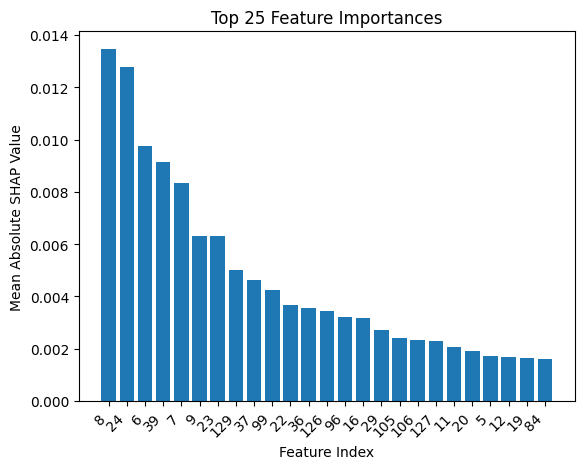

In [ ]:
import matplotlib.pyplot as plt

print(shap_values.shape)
# Reshape SHAP values for aggregation
shap_values_reshaped = shap_values.reshape((shap_values.shape[0], -1))

# Aggregate SHAP values across features and outputs
mean_shap_values = np.abs(np.mean(shap_values_reshaped, axis=0))

# Identify the important features
feature_importance = mean_shap_values[:133]  # Assuming 133 features

# Get original feature indices
feature_indices = np.arange(feature_importance.shape[0])
print(feature_indices)
# Sort features by importance
sorted_indices = np.argsort(feature_importance)[::-1]

# If X_test_ is a NumPy array, access features using original indices
top_n = 25
top_features = sorted_indices[:top_n]
plt.bar(range(top_n), feature_importance[top_features])
plt.xticks(range(top_n), feature_indices[top_features], rotation=45, ha="right")
plt.xlabel("Feature Index")
plt.ylabel("Mean Absolute SHAP Value")
plt.title("Top 25 Feature Importances")
plt.show()

In [ ]:
print(sorted_indices)

[  8  24   6  39   7   9  23 129  37  99  22  36 126  96  16  29 105 106
 127  11  20   5  12  19  84  26  13 128  27  15  83  55  35   3  74  98
  86 101   1 103  21  71  56  14 115  28  94  53  25  43 111  67  72  68
 125 118  85  57  41   4  79  66  45  34  91  97 102  54  95   0  10 110
  82 131  50   2  69  31 112 116  47 120  42 100  32 113  76 114 121  46
  18  89 132  92  77  30 123 124  61  38  88  70  49  87 109 107  51  65
  73  17  59  48 119 104  40 108  78  80  58  33  62 117  63  75  64  81
  44  60  90 122 130  52  93]


2.1.3 TESTING WITH SELECTED FEATURES

In [ ]:
# here df_new is the dataframe containing all the data


In [ ]:
needed_names = [1,2,5,10,13,26,28,31,51,52,64,77,90,121,127, 244]
needed_names = [i-1 for i in needed_names]
df_new = df_concatenated[df_concatenated.columns[needed_names]]
print(df_new)
df_new = df_new.dropna()
print(df_new)

           1      2     5      10     13     26     28     31      51     52   \
0           33  124.0  -7.0  123.0  348.0 -197.0   82.0  297.0 -1010.0   -3.0   
1           67  102.0 -49.0  113.0  330.0 -205.0   76.0  280.0 -1017.0   13.0   
2          100   59.0  -9.0  106.0  298.0 -179.0  114.0  301.0 -1017.0  -58.0   
3          133  119.0 -22.0   92.0  345.0 -284.0  135.0  301.0  -999.0 -107.0   
4          167   99.0  -3.0  136.0  356.0 -289.0   66.0  288.0  -973.0 -155.0   
...        ...    ...   ...    ...    ...    ...    ...    ...     ...    ...   
497401  882991    NaN   NaN    NaN    NaN    NaN    NaN    NaN     NaN    NaN   
497402  883025    NaN   NaN    NaN    NaN    NaN    NaN    NaN     NaN    NaN   
497403  883058    NaN   NaN    NaN    NaN    NaN    NaN    NaN     NaN    NaN   
497404  883091    NaN   NaN    NaN    NaN    NaN    NaN    NaN     NaN    NaN   
497405  883125    NaN   NaN    NaN    NaN    NaN    NaN    NaN     NaN    NaN   

          64      77     90

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.utils import to_categorical
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from keras.layers import Dropout


# Extract features and labels
X = df_new.iloc[:, 1:-1].values  # Assuming features are in columns 1 to 15
y = df_new.iloc[:, -1].values # Assuming labels are in the last column

y= y.astype('int')

y[y == 4 ] = 3
y[y == 5 ] = 4

# Normalize/Standardize features
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Choose the number of time steps
time_steps = 20

# Reshape features for LSTM input
X_reshaped = np.array([X[i - time_steps:i, :] for i in range(time_steps, len(X))])
y_reshaped = y[time_steps:]


# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y_reshaped, test_size=0.2, random_state=42)

# Build LSTM model
num_classes = len(np.unique(y))
model = Sequential()
model.add(LSTM(units=50, activation='relu', input_shape=(time_steps, X.shape[1])))
model.add(Dense(units=100, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(units=50, activation='relu'))
model.add(Dense(units=num_classes, activation='softmax'))  # Softmax for multiclass classification

model.compile(optimizer=Adam(lr=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Make predictions
predictions = model.predict(X_test)

loss, accuracy = model.evaluate(X_test, y_test)
print(f"Accuracy: {accuracy:.2f}")

Epoch 1/10
10918/10918 [==============================] - 143s 13ms/step - loss: 0.7097 - accuracy: 0.7019
Epoch 2/10
10918/10918 [==============================] - 139s 13ms/step - loss: 0.5328 - accuracy: 0.7849
Epoch 3/10
10918/10918 [==============================] - 139s 13ms/step - loss: 0.4789 - accuracy: 0.8062
Epoch 4/10
10918/10918 [==============================] - 138s 13ms/step - loss: 0.4480 - accuracy: 0.8190
Epoch 5/10
10918/10918 [==============================] - 141s 13ms/step - loss: 0.4260 - accuracy: 0.8281
Epoch 6/10
10918/10918 [==============================] - 137s 13ms/step - loss: 0.4109 - accuracy: 0.8337
Epoch 7/10
10918/10918 [==============================] - 137s 13ms/step - loss: 0.3985 - accuracy: 0.8387
Epoch 8/10
10918/10918 [==============================] - 138s 13ms/step - loss: 0.3901 - accuracy: 0.8419
Epoch 9/10
10918/10918 [==============================] - 137s 13ms/step - loss: 0.3812 - accuracy: 0.8456
Epoch 10/10
2730/2730 [==============

In [ ]:
"# test on unseen data
# now I want to do inference on the subject's 4 data

start_column = 1
end_column = 250

# Generate column names as a range of numbers
column_names = list(range(start_column, end_column + 1))

# Create an empty DataFrame with specified column names
df_concatenated = pd.DataFrame(columns=column_names)


for i in range(4,5):
  for j in range(1,6):
    file_path = '/content/gdrive/MyDrive/Opportunity_extracted/data/S{}-ADL{}/S{}-ADL{}_sensors_data.txt'.format(i, j, i, j)
    print(file_path)
    df = preprocess_sensors_data(file_path)
    df_concatenated = pd.concat([df_concatenated, df])

# for i in range(4,5):
#   # lastly include the drill run
#   file_path = '/content/gdrive/MyDrive/Opportunity_extracted/data/S{}-Drill/S{}-Drill_sensors_data.txt'.format(i, i)
#   print(file_path)
#   df = preprocess_sensors_data(file_path)
#   df_concatenated = pd.concat([df_concatenated, df],ignore_index=True)



needed_names = [1,2,5,10,13,26,28,31,51,52,64,77,90,121,127,244]
needed_names = [i-1 for i in needed_names]
df_new = df_concatenated[df_concatenated.columns[needed_names]]

df_new = df_new.dropna()
X = np.asarray(df_new.drop([1,244], axis=1))
y = np.asarray(df_new[244])
y = y.astype('int')
y[y == 4 ] = 3
y[y == 5 ] = 4

X_scaled = scaler.transform(X)
# Choose the number of time steps
time_steps = 20
# Reshape features for LSTM input
X_reshaped = np.array([X_scaled[i - time_steps:i, :] for i in range(time_steps, len(X))])
y_reshaped = y[time_steps:]


# Evaluate the model on the scaled holdout test set
test_loss, test_accuracy = model.evaluate(X_reshaped, y_reshaped)

# Print the evaluation results
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


/content/gdrive/MyDrive/Opportunity_extracted/data/S4-ADL1/S4-ADL1_sensors_data.txt
/content/gdrive/MyDrive/Opportunity_extracted/data/S4-ADL2/S4-ADL2_sensors_data.txt
/content/gdrive/MyDrive/Opportunity_extracted/data/S4-ADL3/S4-ADL3_sensors_data.txt
/content/gdrive/MyDrive/Opportunity_extracted/data/S4-ADL4/S4-ADL4_sensors_data.txt
/content/gdrive/MyDrive/Opportunity_extracted/data/S4-ADL5/S4-ADL5_sensors_data.txt
3645/3645 [==============================] - 18s 5ms/step - loss: 1.9872 - accuracy: 0.3001
Test Loss: 1.9871915578842163
Test Accuracy: 30.01%


In [ ]:
df_new = df_new.dropna()

X = np.array(df_new.drop([244], axis=1))
y = np.array(df_new[244])
y = y.astype('int')


scaler = MinMaxScaler()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20, stratify=y)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest
from scipy.stats import pearsonr


# Create a RandomForestClassifier with class weights
rf_model = RandomForestClassifier(class_weight='balanced',max_depth=12,max_features='sqrt',n_estimators=500, max_samples=0.4)

rf_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test_scaled)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with selected features: {accuracy:.2f}")

print(classification_report(y_test, y_pred))

Accuracy with selected features: 0.80
              precision    recall  f1-score   support

           0       0.69      0.76      0.72     24184
           1       0.84      0.77      0.80     47949
           2       0.64      0.66      0.65     27075
           4       0.95      0.97      0.96     27801
           5       0.96      0.99      0.98      4010

    accuracy                           0.80    131019
   macro avg       0.82      0.83      0.82    131019
weighted avg       0.80      0.80      0.80    131019



In [ ]:
# test on unseen data
# now I want to do inference on the subject's 4 data

start_column = 1
end_column = 250

# Generate column names as a range of numbers
column_names = list(range(start_column, end_column + 1))

# Create an empty DataFrame with specified column names
df_concatenated = pd.DataFrame(columns=column_names)


for i in range(4,5):
  for j in range(1,6):
    file_path = '/content/gdrive/MyDrive/Opportunity_extracted/data/S{}-ADL{}/S{}-ADL{}_sensors_data.txt'.format(i, j, i, j)
    print(file_path)
    df = preprocess_sensors_data(file_path)
    df_concatenated = pd.concat([df_concatenated, df])

# for i in range(4,5):
#   # lastly include the drill run
#   file_path = '/content/gdrive/MyDrive/Opportunity_extracted/data/S{}-Drill/S{}-Drill_sensors_data.txt'.format(i, i)
#   print(file_path)
#   df = preprocess_sensors_data(file_path)
#   df_concatenated = pd.concat([df_concatenated, df],ignore_index=True)



needed_names = [2,5,10,13,26,28,31,51,52,64,77,90,121,127, 244]
needed_names = [i-1 for i in needed_names]
df_new = df_concatenated[df_concatenated.columns[needed_names]]
print(df_new)

df_new = df_new.dropna()
X = np.asarray(df_new.drop([244], axis=1))
y = np.asarray(df_new[244])
y = y.astype('int')

X_scaled = scaler.transform(X)
y_pred = rf_model.predict(X_scaled)

# Calculate accuracy
accuracy = accuracy_score(y, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Print classification report
print("\nClassification Report:")
print(classification_report(y, y_pred))

/content/gdrive/MyDrive/Opportunity_extracted/data/S4-ADL1/S4-ADL1_sensors_data.txt
/content/gdrive/MyDrive/Opportunity_extracted/data/S4-ADL2/S4-ADL2_sensors_data.txt
/content/gdrive/MyDrive/Opportunity_extracted/data/S4-ADL3/S4-ADL3_sensors_data.txt
/content/gdrive/MyDrive/Opportunity_extracted/data/S4-ADL4/S4-ADL4_sensors_data.txt
/content/gdrive/MyDrive/Opportunity_extracted/data/S4-ADL5/S4-ADL5_sensors_data.txt
        2     5      10     13     26     28     31      51     52     64   \
0     -18.0  -9.0  367.0  260.0   93.0  259.0  384.0  -964.0  138.0 -818.0   
1     -12.0 -38.0  367.0  242.0  102.0  241.0  373.0  -964.0  137.0 -819.0   
2       0.0 -38.0  361.0  267.0   92.0  250.0  387.0  -976.0  127.0 -857.0   
3     -10.0 -33.0  389.0  245.0   79.0  240.0  439.0 -1004.0   67.0 -936.0   
4     -19.0 -10.0  504.0  338.0  -28.0  229.0  541.0 -1005.0   54.0 -973.0   
...     ...   ...    ...    ...    ...    ...    ...     ...    ...    ...   
30521   NaN   NaN    NaN    NaN   